# Python and Friends

This is a very quick run-through of some python syntax

In [1]:
# The %... is an iPython thing, and is not part of the Python language.
# In this case we're just telling the plotting library to draw things on
# the notebook, instead of on a separate window.
%matplotlib inline 
#this line above prepares IPython notebook for working with matplotlib

# See all the "as ..." contructs? They're just aliasing the package names.
# That way we can call methods like plt.plot() instead of matplotlib.pyplot.plot().

import numpy as np # imports a fast numerical programming library
import scipy as sp #imports stats functions, amongst other things
import matplotlib as mpl # this actually imports matplotlib
import matplotlib.cm as cm #allows us easy access to colormaps
import matplotlib.pyplot as plt #sets up plotting under plt
import pandas as pd #lets us handle data as dataframes
#sets up pandas table display
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns #sets up styles and gives us more plotting options

##The Python Language

Lets talk about using Python as a calculator...

In [2]:
1+2

3

Notice integer division and floating-point error below!

In [3]:
1/2,1.0/2.0,3*3.2

(0, 0.5, 9.600000000000001)

Here is how we can print things. Something on the last line by itself is returned as the output value.

In [4]:
print (1+3.0,"\n",5/3.0)
5/3

(4.0, '\n', 1.6666666666666667)


1

We can obtain the type of a variable, and use boolean comparisons tontest these types.

In [5]:
a=5.0/6.0
print(a)
print (type(a))

0.833333333333
<type 'float'>


In [6]:
import types
a=5.0/6.0
type(a)==float()

False

In [7]:
type(a)==int()

False

## Python and Iteration (and files)

In working with python I always remember: a python is a duck.

What I mean is, python has a certain way of doing things. For example lets call one of these ways listiness. Listiness works on lists, dictionaries, files, and a general notion of something called an iterator.

But first, lets introduce the notion of a comprehension. Its a way of constructing a list

In [8]:
alist=[1,2,3,4,5]
asquaredlist=[i*i for i in alist]
asquaredlist

[1, 4, 9, 16, 25]

Python has some nifty functions like `enumerate` and `zip`. The former gives a list of tuples with each tuple of the form `(index, value)`, while the latter takes elements from each list and outs them together into a tuple, thus creating a list of tuples. The first is a duck, but the second isnt.

In [9]:
enumerate(asquaredlist),zip(alist, asquaredlist)

(<enumerate at 0x1a0cddd730>, [(1, 1), (2, 4), (3, 9), (4, 16), (5, 25)])

Someone realized that design flaw and created izip.

In [10]:
from itertools import izip
izip(alist, asquaredlist)

In [11]:
print enumerate(asquaredlist)

In [12]:
[k for k in enumerate(asquaredlist)]

[(0, 1), (1, 4), (2, 9), (3, 16), (4, 25)]

Open files behave like lists too! Here we get each line in the file and find its length, using the comprehension syntax to put these lengths into a big list.

In [13]:
linelengths=[len(line) for line in open("hamlet.txt")]#poor code as we dont close the file
print(linelengths)

[9, 27, 2, 24, 2, 2, 2, 2, 22, 2, 28, 60, 29, 28, 27, 22, 22, 24, 25, 18, 24, 11, 21, 20, 22, 32, 10, 28, 31, 12, 22, 27, 2, 51, 32, 2, 67, 13, 2, 18, 2, 2, 2, 8, 2, 50, 2, 49, 2, 6, 14, 2, 7, 45, 2, 6, 21, 2, 7, 11, 2, 6, 5, 2, 7, 41, 2, 6, 53, 2, 7, 48, 25, 2, 6, 27, 2, 7, 23, 2, 6, 19, 39, 46, 2, 7, 48, 2, 32, 2, 6, 25, 2, 6, 27, 2, 7, 22, 2, 6, 30, 24, 2, 7, 24, 22, 2, 9, 2, 6, 18, 2, 6, 6, 25, 2, 6, 17, 2, 6, 45, 2, 6, 47, 2, 6, 22, 2, 6, 36, 42, 48, 38, 45, 37, 42, 2, 6, 32, 2, 6, 18, 41, 42, 31, 2, 6, 20, 41, 2, 6, 20, 51, 51, 43, 30, 2, 6, 51, 2, 23, 2, 6, 48, 2, 6, 43, 2, 6, 47, 2, 6, 49, 2, 6, 23, 2, 6, 23, 2, 6, 50, 42, 40, 54, 2, 6, 17, 2, 6, 22, 2, 6, 42, 2, 15, 2, 6, 33, 2, 6, 46, 42, 22, 2, 6, 41, 38, 19, 2, 6, 26, 2, 6, 25, 36, 40, 45, 42, 15, 2, 6, 48, 47, 2, 6, 48, 44, 48, 2, 6, 49, 47, 43, 43, 41, 50, 43, 46, 50, 30, 2, 6, 13, 47, 42, 44, 45, 53, 53, 53, 36, 50, 45, 39, 43, 35, 50, 39, 49, 36, 47, 41, 39, 48, 42, 39, 46, 45, 41, 50, 44, 2, 6, 37, 47, 49, 45, 2, 6, 41

In [14]:
sum(linelengths), np.mean(linelengths), np.median(linelengths), np.std(linelengths)

(180718, 26.69394387001477, 26.0, 21.02987202142746)

But perhaps we want to access Hamlet word by word and not line by line

In [2]:
hamletfile=open("hamlet.txt")
hamlettext=hamletfile.read()
hamletfile.close()
hamlettokens=hamlettext.split()#split with no arguments splits on whitespace
len(hamlettokens)

31659

One can use the `with` syntax which cretaes a context. The file closing is then done automatically for us.

In [16]:
with open("hamlet.txt") as hamletfile:
    hamlettext=hamletfile.read()
    hamlettokens=hamlettext.split()
    print (len(hamlettokens))

31659


There are roughly 32,000 words in Hamlet.

###The indexing of lists

In [17]:
print (hamlettext[:10])#first 1000 characters from Hamlet.

﻿XXXX
H


In [18]:
print (hamlettext[-10:])#and last 1000 characters from Hamlet.

ot off.]



Lets split the word tokens. The first one below reads, give me the second, third, and fourth words (remember that python is 0 indexed). Try and figure what the others mean.

In [19]:
print (hamlettokens[1:4], hamlettokens[:4], hamlettokens[0], hamlettokens[-1])

(['HAMLET,', 'PRINCE', 'OF'], ['\xef\xbb\xbfXXXX', 'HAMLET,', 'PRINCE', 'OF'], '\xef\xbb\xbfXXXX', 'off.]')


In [20]:
hamlettokens[1:8:2]#get every 2nd world between the 2nd and the 9th: ie 2nd, 4th, 6th, and 8th

['HAMLET,', 'OF', 'by', 'Shakespeare']

range and xrange get the list of integers upto N. But xrange behaves like an iterator. The reason for this is that there is no point generaing all os a million integers. We can just add 1 to the previous one and save memory. So we trade off storage for computation.

In [21]:
mylist=[]
for i in range(10): #I used Python3 for this test due to the Python2 gave me problem
    mylist.append(i)
mylist

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

## Dictionaries

These are the bread and butter. You will use them a lot. They even duck like lists. But be careful how.

In [4]:
adict={'one':1, 'two': 2, 'three': 3}
for i in [adict], [(k,v) for k,v in adict.items()], adict.values()]
    print i 

SyntaxError: invalid syntax (<ipython-input-4-b5dd4de4e256>, line 2)

The keys do not have to be strings. From python 2.7 you can use dictionary comprehensions as well

In [23]:
mydict ={k:v for (k,v) in zip(alist, asquaredlist)}
mydict

{1: 1, 2: 4, 3: 9, 4: 16, 5: 25}

You can construct then nicely using the function `dict`.

In [24]:
dict(a=1, b=2)

{'a': 1, 'b': 2}

###and conversion to json

In [25]:
import json

In [26]:
s=json.dumps(mydict)
print s

{"1": 1, "2": 4, "3": 9, "4": 16, "5": 25}


In [27]:
json.loads(s)

{u'1': 1, u'2': 4, u'3': 9, u'4': 16, u'5': 25}

## Strings

Basically they behave like immutable lists

In [28]:
lastword=hamlettokens[-1]
print(lastword)

off.]


lastword[-2]="k"#cant change a part of a string

In [29]:
lastword[-2]

'.'

You can join a list with a separator to make a string.

In [30]:
wierdstring=",".join(hamlettokens)
wierdstring[:1000]

"\xef\xbb\xbfXXXX,HAMLET,,PRINCE,OF,DENMARK,by,William,Shakespeare,PERSONS,REPRESENTED.,Claudius,,King,of,Denmark.,Hamlet,,Son,to,the,former,,and,Nephew,to,the,present,King.,Polonius,,Lord,Chamberlain.,Horatio,,Friend,to,Hamlet.,Laertes,,Son,to,Polonius.,Voltimand,,Courtier.,Cornelius,,Courtier.,Rosencrantz,,Courtier.,Guildenstern,,Courtier.,Osric,,Courtier.,A,Gentleman,,Courtier.,A,Priest.,Marcellus,,Officer.,Bernardo,,Officer.,Francisco,,a,Soldier,Reynaldo,,Servant,to,Polonius.,Players.,Two,Clowns,,Grave-diggers.,Fortinbras,,Prince,of,Norway.,A,Captain.,English,Ambassadors.,Ghost,of,Hamlet's,Father.,Gertrude,,Queen,of,Denmark,,and,Mother,of,Hamlet.,Ophelia,,Daughter,to,Polonius.,Lords,,Ladies,,Officers,,Soldiers,,Sailors,,Messengers,,and,other,Attendants.,SCENE.,Elsinore.,ACT,I.,Scene,I.,Elsinore.,A,platform,before,the,Castle.,[Francisco,at,his,post.,Enter,to,him,Bernardo.],Ber.,Who's,there?,Fran.,Nay,,answer,me:,stand,,and,unfold,yourself.,Ber.,Long,live,the,king!,Fran.,Bernardo?,Be

## Functions

Functions are even more the bread and butter. You'll see them as methods on objects, or standing alone by themselves.

In [31]:
def square(x):
    return(x*x)
def cube(x):
    return x*x*x
square(5),cube(5)

(25, 125)

In [32]:
print square, type(cube)

<function square at 0x1a0cdf15f0> <type 'function'>


In Python, functions are "first-class". This is just a fancy way of saying, you can pass functions to other functions

In [33]:
def sum_of_anything(x,y,f):
    print x,y,f
    return(f(x) + f(y))
sum_of_anything(3,4,square)

3 4 <function square at 0x1a0cdf15f0>


25

Python functions can have positional arguments and keyword arguments. Positional arguments are stored in a tuple, and keyword arguments in a dictionary. Note the "starred" syntax

In [34]:
def f(a,b,*posargs,**dictargs):
    print "got",a,b,posargs, dictargs
    return a
print f(1,3)
print f(1,3,4,d=1,c=2)

got 1 3 () {}
1
got 1 3 (4,) {'c': 2, 'd': 1}
1


>**YOUR TURN** create a dictionary with keys the integers upto and including 10, and values the cubes of these dictionaries

In [35]:
#your code here

##Booleans and Control-flow

Lets test for belonging...

In [36]:
a=[1,2,3,4,5]
1 in a

True

In [37]:
6 in a

False

Python supports if/elif/else clauses for multi-way conditionals

In [38]:
def do_it(x):
    if x==1:
        print "One"
    elif x==2:
        print "Two"
    else:
        print x
do_it(1)

One


In [39]:
do_it(2), do_it(3)

Two
3


(None, None)

You can `break` out of a loop based on a condition. The loop below is a for loop.

In [40]:
for i in range(10):
    print i
    if (i > 5):
        break

0
1
2
3
4
5
6


While loops are also supported. `continue` continues to the next iteration of the loop skipping all the code below, while `break` breaks out of it.

In [41]:
i=0
while i < 10:
    print i
    i=i+1
    if i < 5:
        continue
    else:
        break


0
1
2
3
4


## Exceptions

This is the way to catch errors.

In [42]:
try:
    f(1)#takes atleast 2 arguments
except:
    import sys
    print sys.exc_info()

(<type 'exceptions.TypeError'>, TypeError('f() takes at least 2 arguments (1 given)',), <traceback object at 0x1a0cdf9128>)


## All together now

Lets see what hamlet gives us. We convert all words to lower-case

In [1]:
hamletlctokens=[word.lower() for word in hamlettokens]
hamletlctokens.count("thou")

NameError: name 'hamlettokens' is not defined

We then find a unique set of words using python's `set` data structure. We count how often those words occured usinf the `count` method on lists.

In [49]:
uniquelctokens=set(hamletlctokens)

In [50]:
tokendict={}
for ut in uniquelctokens:
    tokendict[ut]=hamletlctokens.count(ut)

In [2]:
hamletfile=open("hamlet.txt")
hamlettext=hamletfile.read()
hamletfile.close()
hamlettokens=hamlettext.split()#split with no arguments splits on whitespace
len(hamlettokens)
hamletlctokens=[word.lower() for word in hamlettokens]
uniquelctokens=set(hamletlctokens)
tokendict={}
for ut in uniquelctokens:
    tokendict[ut]=hamletlctokens.count(ut)
    

We find the 100 most used words...

In [52]:
L=sorted(tokendict.iteritems(), key= lambda(k,v):v, reverse=True)[:100]


Lets get the top 20 of this and plot a bar chart!

[('the', 1136), ('and', 943), ('to', 720), ('of', 667), ('a', 527), ('my', 512), ('i', 510), ('in', 420), ('you', 412), ('ham.', 358), ('that', 337), ('it', 324), ('is', 320), ('his', 295), ('not', 270), ('with', 264), ('this', 250), ('your', 241), ('for', 231), ('but', 228)]


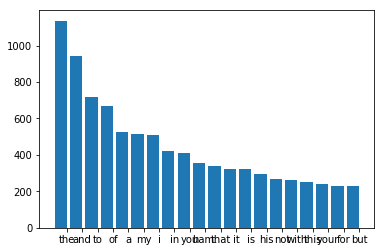

In [53]:
import numpy as np 
topfreq=L[:20]
print (topfreq)
pos = np.arange(len(topfreq))
plt.bar(pos, [e[1] for e in topfreq]);
plt.xticks(pos+0.4, [e[0] for e in topfreq]);